In [1]:
%load_ext autoreload
%autoreload 2


import pandas as pd
import numpy as np

np.random.seed(None)
df = pd.read_csv("glitchstream/glitch_population/data/gravity_spy_L1_O3a.csv")
item = df.iloc[np.random.randint(0, len(df))]
print(item)
print(item.gravityspy_id)
print(len(df))

print(df['gravityspy_id'][1:4])

#print(df.head(3))

item_df = df.iloc[[3]]
print(item_df.event_time)


event_time                                         1253423772.86768
ifo                                                              L1
duration                                                    0.46777
peak_frequency                                           333.030212
central_freq                                            3713.868896
bandwidth                                               7356.179199
amplitude                                                       0.0
snr                                                        44.39806
q_value                                                    5.656854
gravityspy_id                                            5gFz23I78r
label                                               Repeating_Blips
ml_confidence                                              0.972292
url1              https://panoptes-uploads.zooniverse.org/produc...
url2              https://panoptes-uploads.zooniverse.org/produc...
url3              https://panoptes-uploads.zooni

/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/gwpy/plot/plot.py:296: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  super().show(warn=warn)


--- Sampled Spectrogram Values ---
1.6382312648563763e-16 1 / Hz


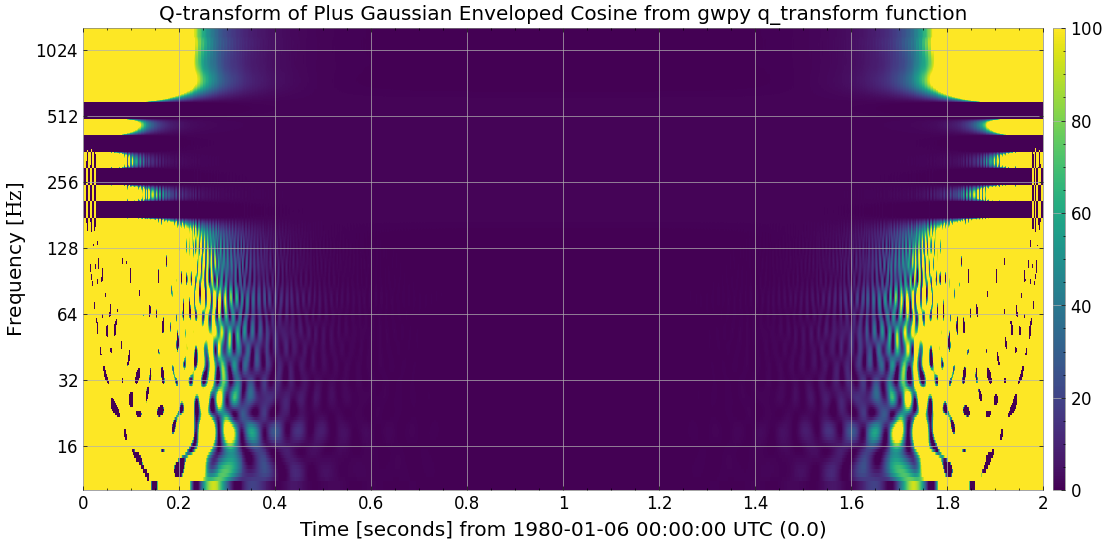

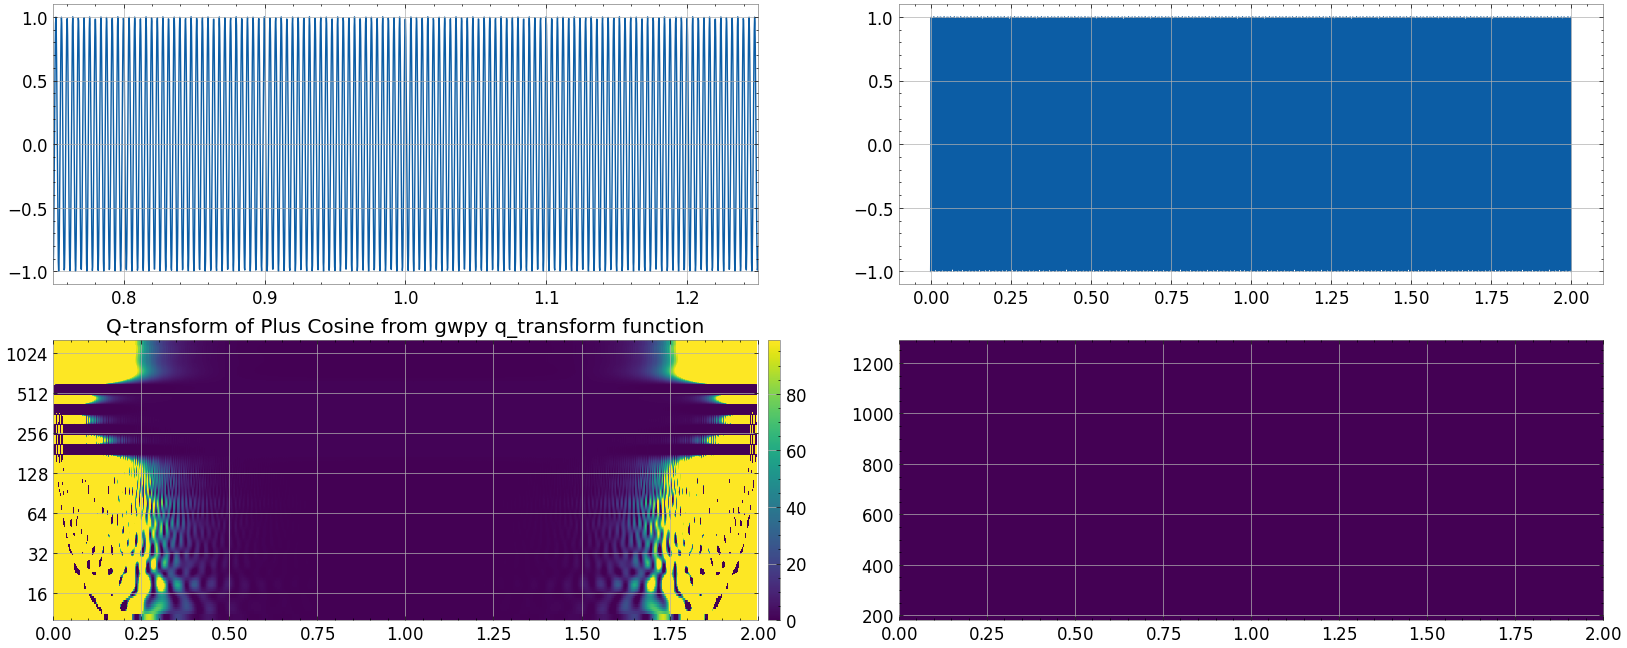

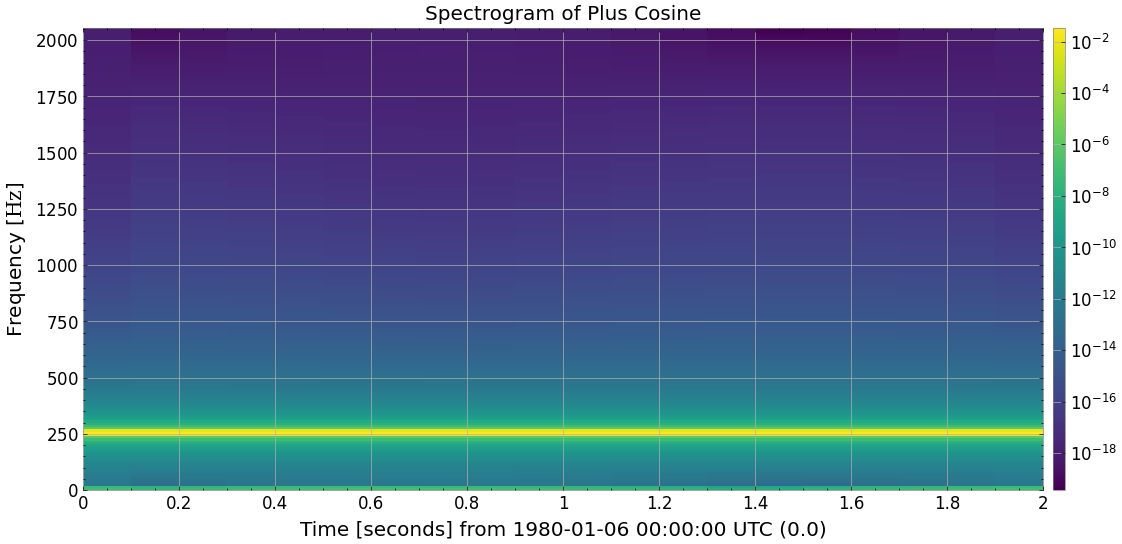

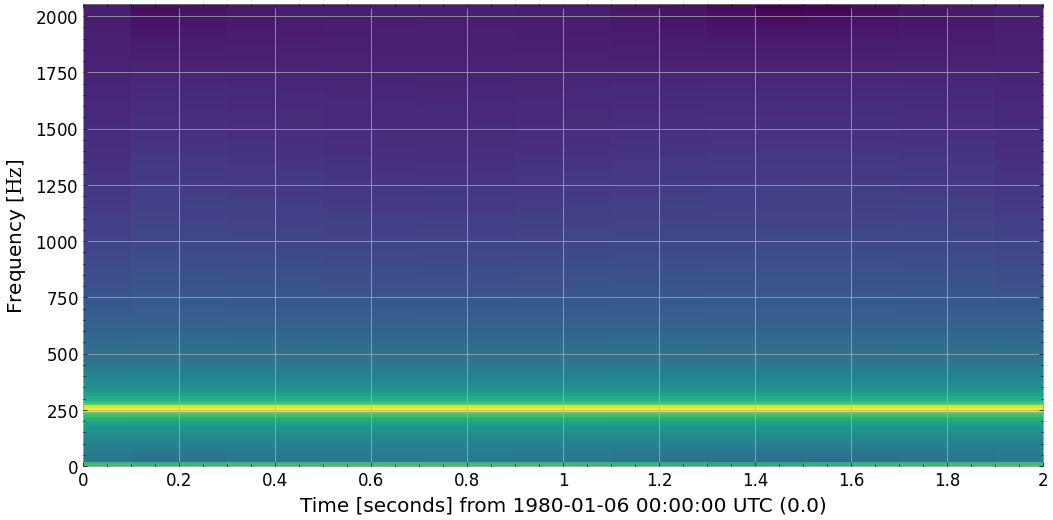

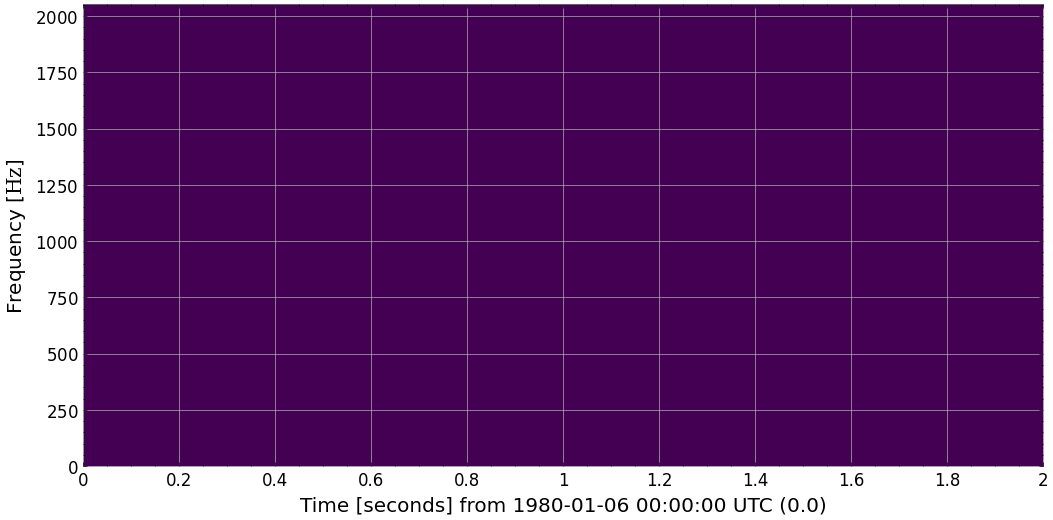

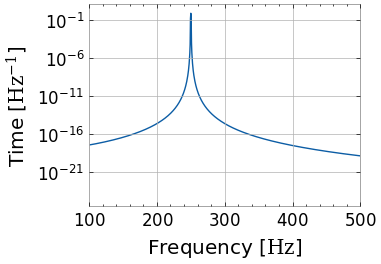

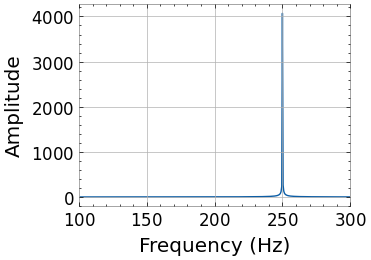

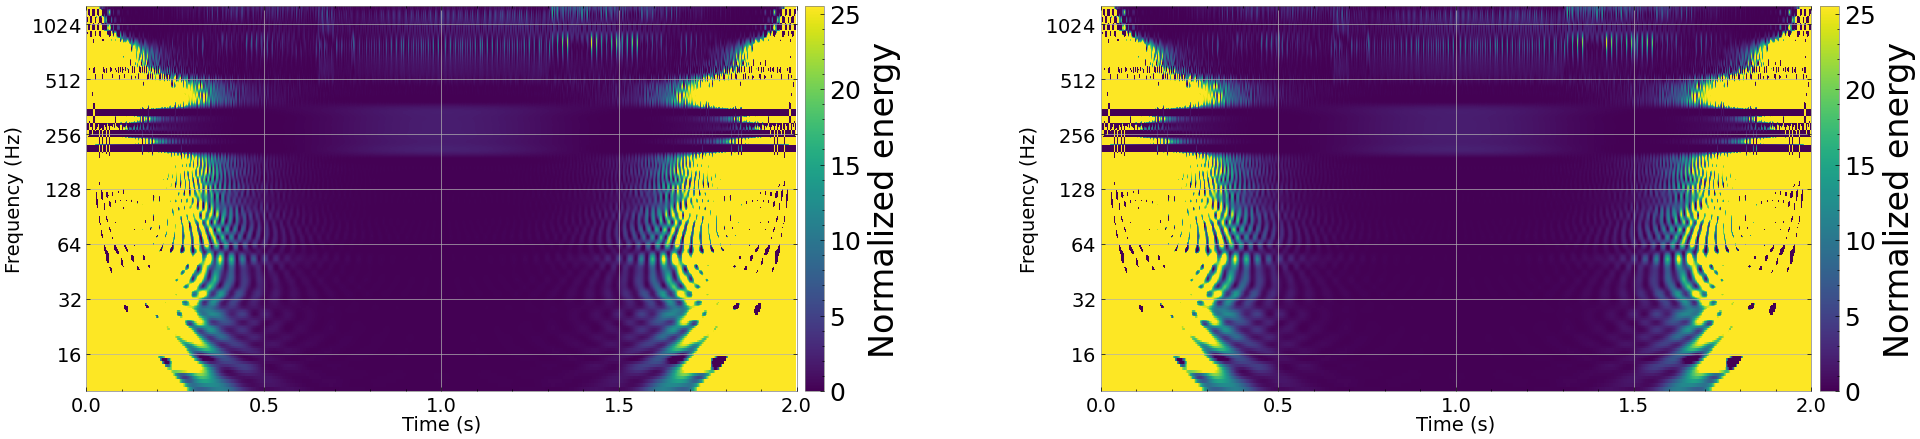

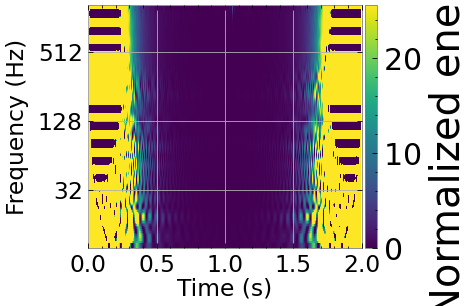

In [30]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
from glitchstream.deepextractor import DeepExtractor, DeepPlotter, plot_q_transform
from scipy.fft import rfft, rfftfreq

fs = 4096.
duration = 2.0
t = np.linspace(0, duration, int(fs*duration))

plus_cos = np.cos(500*np.pi*t)
minus_cos = -1 * np.cos(500*np.pi*t)
gaussian_cos = np.exp(-0.5*((t-1)/0.05)**2) * np.cos(500*np.pi*t)

ts_plus = TimeSeries(plus_cos, dt=1/fs, t0=0)
ts_minus = TimeSeries(minus_cos, dt=1/fs, t0=0)
ts_gaussian_cos = TimeSeries(gaussian_cos, dt=1/fs, t0=0)

q_plus = ts_plus.q_transform(qrange=(4, 64), 
                               frange=(10, 1290),
                               tres=0.002,
                               fres=0.5,
                               whiten=False)
q_minus = ts_minus.q_transform(whiten=False)
plot = q_plus.plot(vmin=0, vmax=100, title='Q-transform of Plus Gaussian Enveloped Cosine from gwpy q_transform function')
ax = plot.gca()
ax.colorbar()
ax.set_yscale('log',base=2)
plot.show()


spec_plus = ts_plus.spectrogram(0.1)
spec_minus = ts_minus.spectrogram(0.1)

fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20,8))

xsample = len(spec_plus)//2
ysample = len(spec_plus[0])//2
print('--- Sampled Spectrogram Values ---')
print(spec_plus[int(xsample), int(ysample)])
plot = spec_plus.plot(norm='log',title='Spectrogram of Plus Cosine')
ax = plot.gca()
#ax.set_ylim(100,300)
ax.colorbar()
plot.show()

plot = spec_minus.plot(norm='log')
plot.show()

plot = (spec_plus - spec_minus).plot(norm='log')
plot.show()
#print((spec_plus - spec_minus).mean())

psd_plus = ts_plus.psd()
psd_minus = ts_minus.psd()

plot = psd_plus.plot()
ax = plot.gca()
ax.set_xlim(100,500)
ax.set_xscale('linear')
plot.show()


im1 = axes[0,0].plot(ts_plus.times, ts_plus)
axes[0,0].set_xlim(0.75,1.25)
im2 = axes[0,1].plot(ts_minus.times, ts_minus)
im3 = axes[1,0].imshow(q_plus, aspect='auto', extent=[0,2,10,1290])
axes[1,0].set_yscale('log',base=2)
axes[1,0].set_title('Q-transform of Plus Cosine from gwpy q_transform function')
axes[1,0].colorbar()
im3.set_clim(0,99)
im4 = axes[1,1].imshow(q_minus, aspect='auto')
plt.show()

yf = np.abs(rfft(plus_cos,norm='backward'))
xf = rfftfreq(len(t), 1/fs)
plt.plot(xf, yf)
plt.xlim(100,300); plt.xlabel('Frequency (Hz)'); plt.ylabel('Amplitude')

figs, axes = plt.subplots(nrows=1,ncols=2, figsize=(24,5))

plot_q_transform(ts_plus, ax=axes[0],crop =(1,2))
plot_q_transform(ts_minus, ax=axes[1],crop =(1,2))
plot_q_transform(ts_gaussian_cos, crop = (1,2))
#plot_q_transform(TimeSeries(np.asarray(ts_plus + ts_minus), sample_rate=4096), ax=axes[2],crop =(1,1.5))

/home/kfang/gwsim/glitchstream/.gwsimenv/lib/python3.11/site-packages/gwpy/plot/plot.py:296: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  super().show(warn=warn)


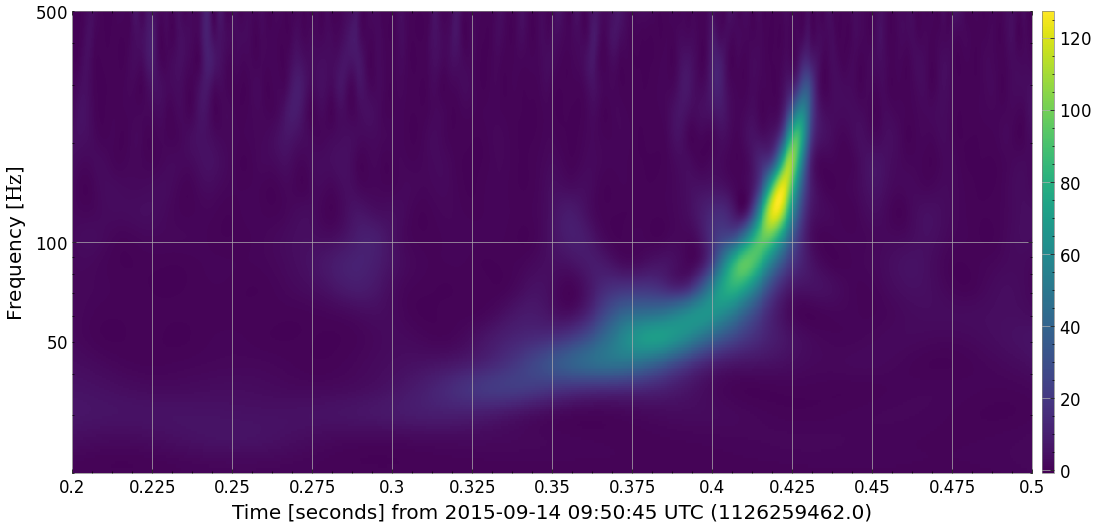

In [3]:
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import numpy as np
from glitchstream.deepextractor import DeepExtractor, DeepPlotter, plot_q_transform
from scipy.fft import rfft, rfftfreq

data = TimeSeries.fetch_open_data('H1', 1126259446, 1126259478)
q_spectrogram = data.q_transform(outseg=(1126259462.2, 1126259462.5))

plot = q_spectrogram.plot(figsize=(12,6))
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log',base=10)
ax.set_ylim(20,500)
ax.colorbar(cmap='viridis')
plot.show()

#new_q_spectrogram = plot_q_transform(data)

1126259462.2 s
1126259462.2 1126259462.5 0.14999985694885254
0.2999999523162842


(20, 500)

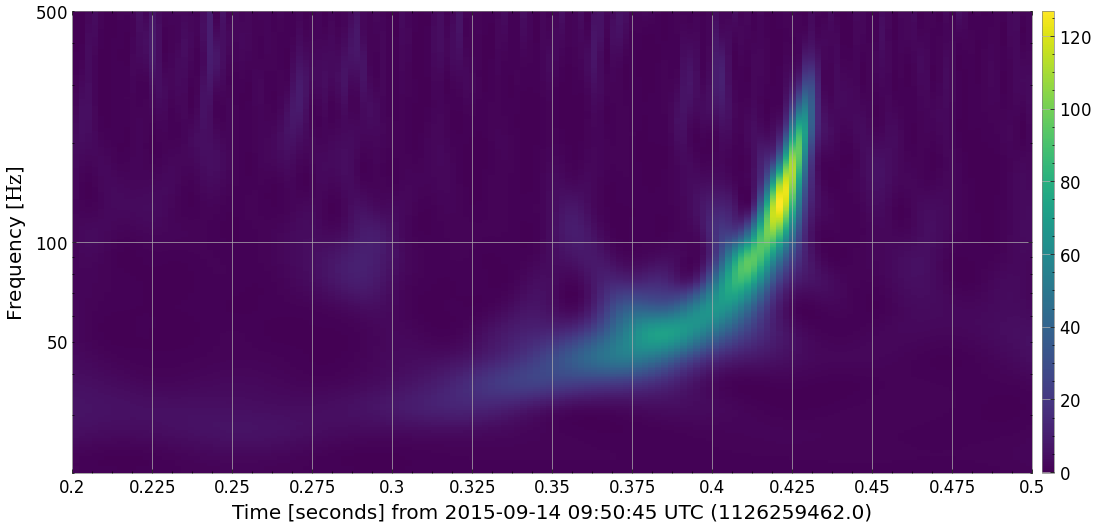

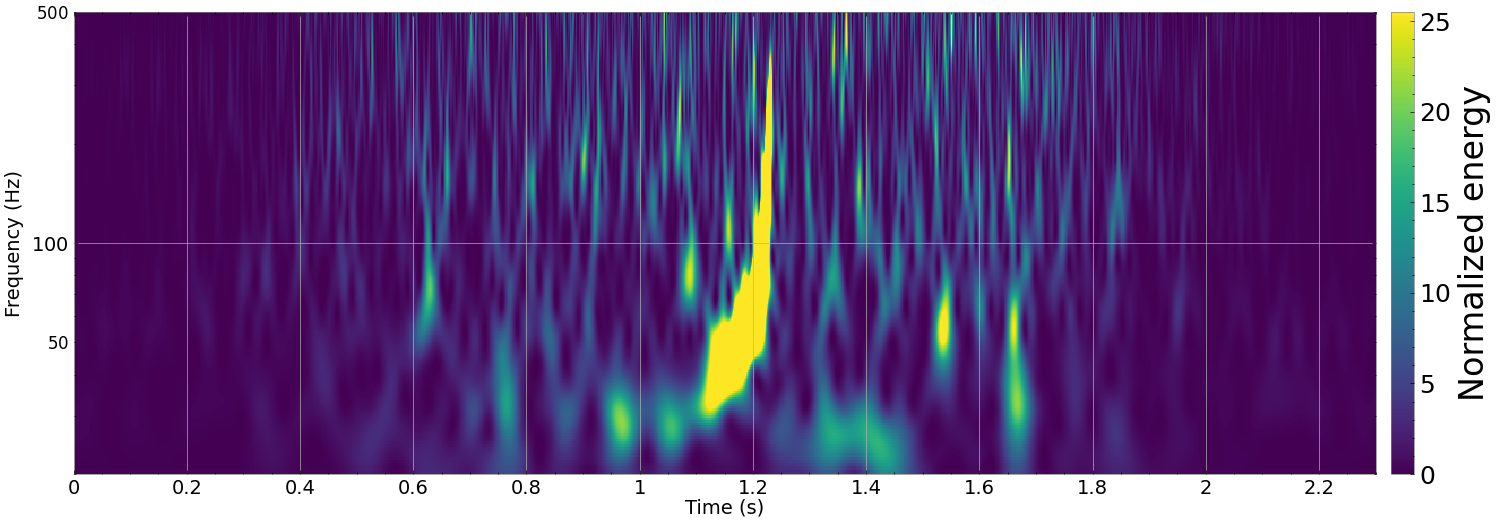

In [8]:


from glitchstream.deepextractor import plot_q_transform
t_mid = (q_spectrogram.span.start + q_spectrogram.span.end) / 2 - q_spectrogram.x0.value
print(q_spectrogram.x0)
print(q_spectrogram.span.start, q_spectrogram.span.end, t_mid)
duration = q_spectrogram.span.end - q_spectrogram.span.start
print(duration)

q_spectrogram_new = data.q_transform(qrange=[4, 64], 
                               frange=[10, 1290],
                               tres=0.002,
                               fres=0.5,
                               whiten=True,
                               outseg=(q_spectrogram.span.start, q_spectrogram.span.end))
plot = q_spectrogram_new.plot(figsize=(12,6))
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log',base=10)
ax.set_ylim(20,500)
ax.colorbar(cmap='viridis')
plot.show()

plot,ax=plt.subplots(figsize=(20,6))

data_cropped = data.crop(q_spectrogram.span.start-1, q_spectrogram.span.end+1)
plot_q_transform(data_cropped, ax=ax)
ax.set_xscale('seconds')
ax.set_yscale('log',base=10)
ax.set_ylim(20,500)
